# A Simple Example of Analyzing COVID-19 Data

## Data source

The data is downloaded from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

## Load data from S3

In [1]:
import pandas as pd

df = pd.read_excel('s3://social-data-analytics-cloud/COVID-19-geographic-disbtribution-worldwide.xlsx') # load the data from s3
df.head() #show the top 5 rows

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:272: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


## The Sum of Case Numbers per Day

In [13]:
sum_death_by_date = df.groupby('dateRep')['cases'].sum() #aggregate the total case number per day
sum_death_by_date[:] #show the result

dateRep
2019-12-31        27
2020-01-01         0
2020-01-02         0
2020-01-03        17
2020-01-04         0
               ...  
2020-12-10    676114
2020-12-11    693352
2020-12-12    657140
2020-12-13    626421
2020-12-14    540659
Name: cases, Length: 350, dtype: int64

<Axes: xlabel='dateRep'>

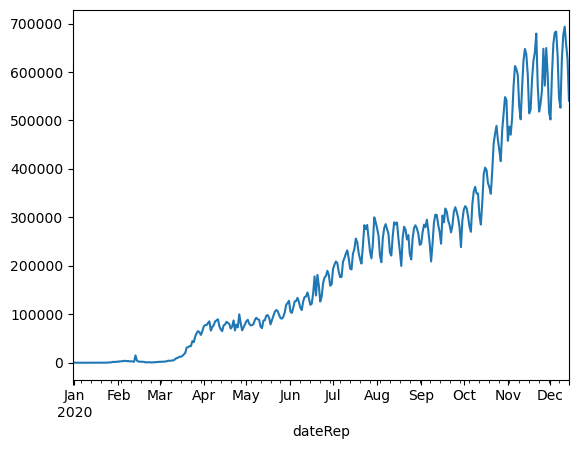

In [14]:
sum_death_by_date.plot() #use a line chart to show the result

## The Top 10 Countries with the Highest Deaths

<Axes: xlabel='countriesAndTerritories'>

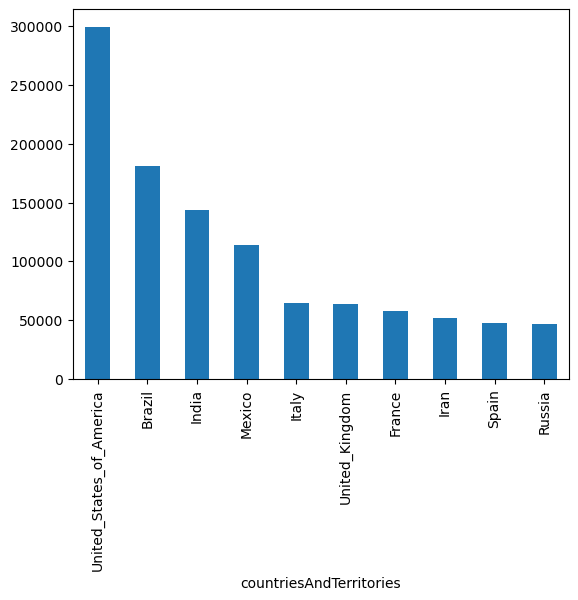

In [16]:
sum_death_by_country = df.groupby('countriesAndTerritories')['deaths'].sum() # calculate the total deaths per day
sum_death_by_country.nlargest(10).plot.bar() # show the top 10 countries on a bar chart